# 📊 Análise de Dados e Machine Learning - Meningite Sudeste

**Análise Epidemiológica com Machine Learning**  
Região Sudeste do Brasil (2018-2022)

---

## Objetivos

1. Realizar análise exploratória detalhada dos dados de meningite
2. Identificar padrões e tendências epidemiológicas
3. Aplicar Machine Learning para identificar fatores predominantes
4. Gerar insights para tomada de decisão em saúde pública

---

## 1. Importação de Bibliotecas

In [1]:
# Bibliotecas para manipulação de dados
import pandas as pd
import numpy as np

# Bibliotecas para visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas para Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib

# Bibliotecas auxiliares
from scipy import stats
import warnings
import os

# Configurações
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("✅ Bibliotecas importadas com sucesso!")

✅ Bibliotecas importadas com sucesso!


## 2. Carregar Dados

In [2]:
# Carregar dados processados
df = pd.read_csv('data/processed/meningite_sudeste_clean.csv')

print("📊 Dataset carregado:")
print(f"   Linhas: {len(df)}")
print(f"   Colunas: {len(df.columns)}")
print(f"\n🔍 Primeiras linhas:")
df.head()

📊 Dataset carregado:
   Linhas: 5
   Colunas: 15

🔍 Primeiras linhas:


,ano,total_casos,mv,mb,mp,mm,masculino,feminino,obitos,alta,menores_5anos,maiores_60anos,taxa_letalidade,prop_masculino,prop_menores_5
0,2018,10066.0,5950.0,1495.0,614.0,224.0,5759,4306,778.0,7945.0,3975,850,7.73,57.21,39.49
1,2019,8869.0,5063.0,1276.0,584.0,213.0,5174,3691,720.0,6746.0,3516,806,8.12,58.34,39.64
2,2020,3622.0,1835.0,623.0,171.0,111.0,2053,1568,349.0,2574.0,1299,449,9.64,56.68,35.86
3,2021,3222.0,1509.0,548.0,207.0,59.0,1786,1434,335.0,2359.0,1055,457,10.40,55.43,32.74
4,2022,6445.0,3145.0,953.0,617.0,130.0,3691,2754,657.0,4607.0,2313,760,10.19,57.27,35.89


## 3. Análise Exploratória de Dados (EDA)

In [3]:
print("="*80)
print("ANÁLISE ESTATÍSTICA DESCRITIVA")
print("="*80)

# Estatísticas gerais
print("\n📊 Estatísticas Gerais:")
print(df.describe().round(2))

print("\n📈 Análise Temporal:")
print(f"   Período: {df['ano'].min()} a {df['ano'].max()}")
print(f"   Total de casos: {df['total_casos'].sum():,.0f}")
print(f"   Média anual: {df['total_casos'].mean():,.0f}")
print(f"   Desvio padrão: {df['total_casos'].std():,.0f}")

print("\n💀 Taxa de Letalidade:")
print(f"   Média: {df['taxa_letalidade'].mean():.2f}%")
print(f"   Mínima: {df['taxa_letalidade'].min():.2f}% ({df[df['taxa_letalidade'] == df['taxa_letalidade'].min()]['ano'].values[0]})")
print(f"   Máxima: {df['taxa_letalidade'].max():.2f}% ({df[df['taxa_letalidade'] == df['taxa_letalidade'].max()]['ano'].values[0]})")

print("\n👥 Distribuição por Sexo:")
total_masc = df['masculino'].sum()
total_fem = df['feminino'].sum()
print(f"   Masculino: {total_masc:,.0f} ({total_masc/(total_masc+total_fem)*100:.1f}%)")
print(f"   Feminino: {total_fem:,.0f} ({total_fem/(total_masc+total_fem)*100:.1f}%)")
print(f"   Razão M/F: {total_masc/total_fem:.2f}:1")

ANÁLISE ESTATÍSTICA DESCRITIVA

📊 Estatísticas Gerais:
           ano  total_casos       mv       mb      mp      mm  masculino  \
count     5.00         5.00     5.00     5.00    5.00    5.00       5.00   
mean   2020.00      6444.80  3500.40   979.00  438.60  147.40    3692.60   
std       1.58      3055.51  1956.26   408.55  228.57   70.02    1788.01   
min    2018.00      3222.00  1509.00   548.00  171.00   59.00    1786.00   
25%    2019.00      3622.00  1835.00   623.00  207.00  111.00    2053.00   
50%    2020.00      6445.00  3145.00   953.00  584.00  130.00    3691.00   
75%    2021.00      8869.00  5063.00  1276.00  614.00  213.00    5174.00   
max    2022.00     10066.00  5950.00  1495.00  617.00  224.00    5759.00   

       feminino  obitos     alta  menores_5anos  maiores_60anos  \
count      5.00    5.00     5.00           5.00            5.00   
mean    2750.60  567.80  4846.20        2431.60          664.40   
std     1268.43  210.58  2480.83        1299.03          19

## 4. Visualizações - Análise Temporal

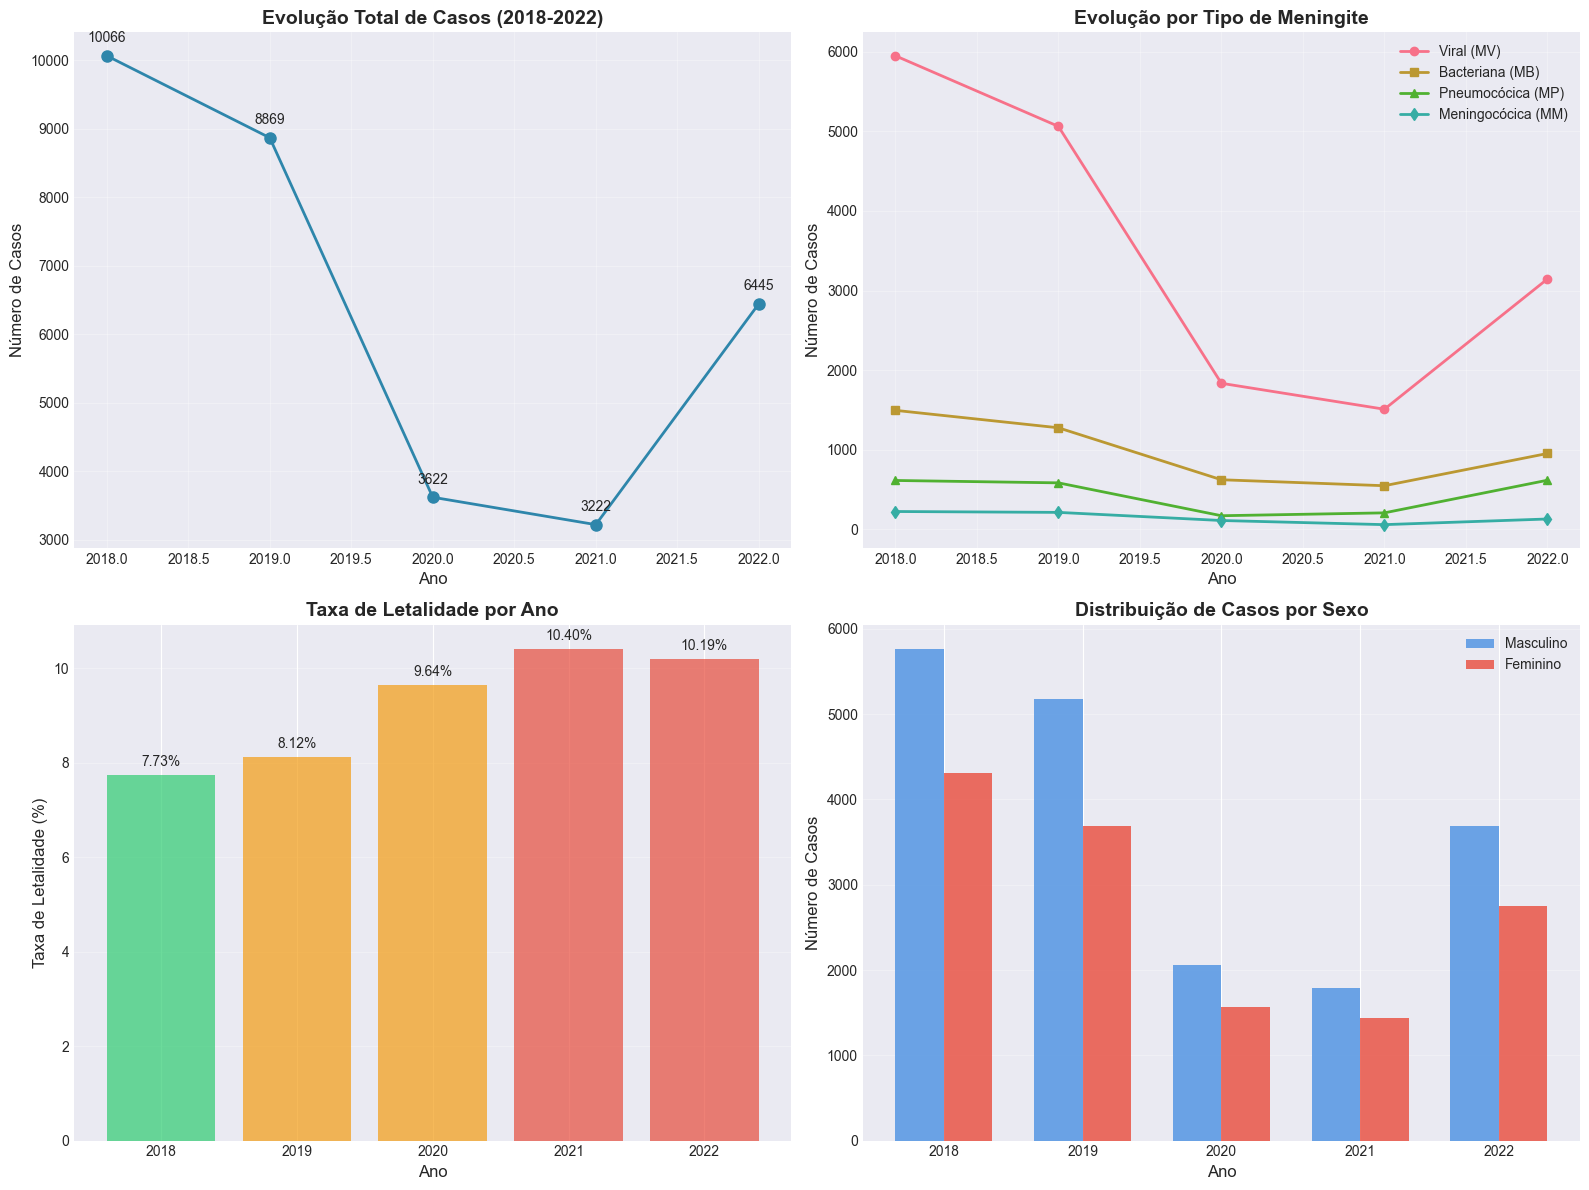

✅ Gráficos salvos em: outputs/graficos/analise_temporal.png


In [4]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Evolução total de casos
axes[0, 0].plot(df['ano'], df['total_casos'], marker='o', linewidth=2, markersize=8, color='#2E86AB')
axes[0, 0].set_title('Evolução Total de Casos (2018-2022)', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Ano', fontsize=12)
axes[0, 0].set_ylabel('Número de Casos', fontsize=12)
axes[0, 0].grid(True, alpha=0.3)
for i, v in enumerate(df['total_casos']):
    axes[0, 0].text(df['ano'].iloc[i], v + 200, str(int(v)), ha='center', fontsize=10)

# 2. Casos por tipo de meningite
axes[0, 1].plot(df['ano'], df['mv'], marker='o', label='Viral (MV)', linewidth=2)
axes[0, 1].plot(df['ano'], df['mb'], marker='s', label='Bacteriana (MB)', linewidth=2)
axes[0, 1].plot(df['ano'], df['mp'], marker='^', label='Pneumocócica (MP)', linewidth=2)
axes[0, 1].plot(df['ano'], df['mm'], marker='d', label='Meningocócica (MM)', linewidth=2)
axes[0, 1].set_title('Evolução por Tipo de Meningite', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Ano', fontsize=12)
axes[0, 1].set_ylabel('Número de Casos', fontsize=12)
axes[0, 1].legend(loc='best')
axes[0, 1].grid(True, alpha=0.3)

# 3. Taxa de letalidade
colors = ['#2ECC71' if x < 8 else '#F39C12' if x < 10 else '#E74C3C' for x in df['taxa_letalidade']]
axes[1, 0].bar(df['ano'], df['taxa_letalidade'], color=colors, alpha=0.7)
axes[1, 0].set_title('Taxa de Letalidade por Ano', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Ano', fontsize=12)
axes[1, 0].set_ylabel('Taxa de Letalidade (%)', fontsize=12)
axes[1, 0].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(df['taxa_letalidade']):
    axes[1, 0].text(df['ano'].iloc[i], v + 0.2, f'{v:.2f}%', ha='center', fontsize=10)

# 4. Distribuição por sexo
x = np.arange(len(df['ano']))
width = 0.35
axes[1, 1].bar(x - width/2, df['masculino'], width, label='Masculino', color='#4A90E2', alpha=0.8)
axes[1, 1].bar(x + width/2, df['feminino'], width, label='Feminino', color='#E94B3C', alpha=0.8)
axes[1, 1].set_title('Distribuição de Casos por Sexo', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Ano', fontsize=12)
axes[1, 1].set_ylabel('Número de Casos', fontsize=12)
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(df['ano'])
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
os.makedirs('outputs/graficos', exist_ok=True)
plt.savefig('outputs/graficos/analise_temporal.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Gráficos salvos em: outputs/graficos/analise_temporal.png")

## 5. Análise de Impacto da Pandemia COVID-19

ANÁLISE DO IMPACTO DA PANDEMIA COVID-19

📊 PERÍODOS:
   Pré-Pandemia (2018-2019):
      Média: 9,468 casos/ano
      Total: 18,935 casos

   Durante Pandemia (2020-2021):
      Média: 3,422 casos/ano
      Total: 6,844 casos
      🔴 Redução: 63.9%

   Pós-Pandemia (2022):
      Total: 6,445 casos
      🟢 Recuperação: 88.3% vs média pandemia


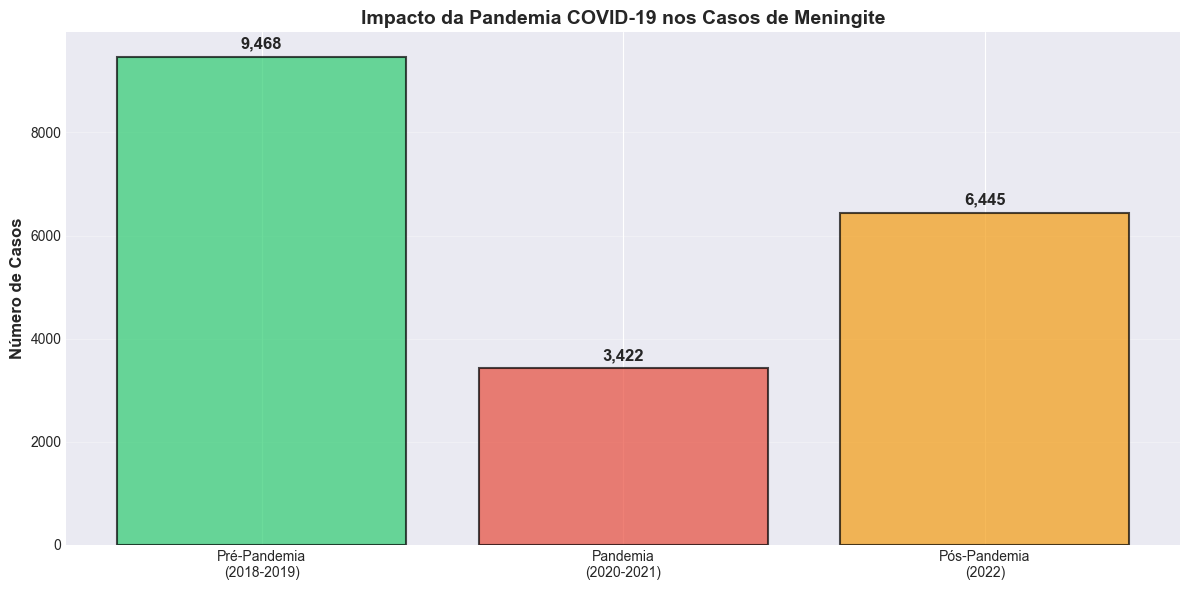


✅ Gráfico salvo em: outputs/graficos/impacto_pandemia.png


In [5]:
print("="*80)
print("ANÁLISE DO IMPACTO DA PANDEMIA COVID-19")
print("="*80)

# Dividir períodos
pre_pandemia = df[df['ano'].isin([2018, 2019])]
durante_pandemia = df[df['ano'].isin([2020, 2021])]
pos_pandemia = df[df['ano'] == 2022]

# Calcular médias
media_pre = pre_pandemia['total_casos'].mean()
media_durante = durante_pandemia['total_casos'].mean()
casos_pos = pos_pandemia['total_casos'].sum()

reducao = (media_pre - media_durante) / media_pre * 100
recuperacao = (casos_pos - media_durante) / media_durante * 100

print(f"\n📊 PERÍODOS:")
print(f"   Pré-Pandemia (2018-2019):")
print(f"      Média: {media_pre:,.0f} casos/ano")
print(f"      Total: {pre_pandemia['total_casos'].sum():,.0f} casos")

print(f"\n   Durante Pandemia (2020-2021):")
print(f"      Média: {media_durante:,.0f} casos/ano")
print(f"      Total: {durante_pandemia['total_casos'].sum():,.0f} casos")
print(f"      🔴 Redução: {reducao:.1f}%")

print(f"\n   Pós-Pandemia (2022):")
print(f"      Total: {casos_pos:,.0f} casos")
print(f"      🟢 Recuperação: {recuperacao:.1f}% vs média pandemia")

# Visualização
fig, ax = plt.subplots(figsize=(12, 6))

periodos = ['Pré-Pandemia\n(2018-2019)', 'Pandemia\n(2020-2021)', 'Pós-Pandemia\n(2022)']
valores = [media_pre, media_durante, casos_pos]
cores = ['#2ECC71', '#E74C3C', '#F39C12']

bars = ax.bar(periodos, valores, color=cores, alpha=0.7, edgecolor='black', linewidth=1.5)
ax.set_ylabel('Número de Casos', fontsize=12, fontweight='bold')
ax.set_title('Impacto da Pandemia COVID-19 nos Casos de Meningite', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')

for bar, valor in zip(bars, valores):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 100,
            f'{valor:,.0f}',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('outputs/graficos/impacto_pandemia.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Gráfico salvo em: outputs/graficos/impacto_pandemia.png")

## 6. Preparação de Dados para Machine Learning

In [6]:
print("="*80)
print("PREPARAÇÃO DE DADOS PARA MACHINE LEARNING")
print("="*80)

# Selecionar features para o modelo
features = [
    'mv',           # Meningite Viral
    'mb',           # Meningite Bacteriana
    'mp',           # Meningite Pneumocócica
    'mm',           # Meningite Meningocócica
    'prop_masculino',    # Proporção masculino
    'prop_menores_5'     # Proporção menores de 5 anos
]

# Preparar dados
X = df[features]
y = df['taxa_letalidade']

print(f"\n📊 Dataset para ML:")
print(f"   Features: {len(features)}")
print(f"   Amostras: {len(X)}")
print(f"   Target: Taxa de Letalidade")

print(f"\n🔍 Features selecionadas:")
for i, feature in enumerate(features, 1):
    print(f"   {i}. {feature}")

# Visualizar correlações
print(f"\n📈 Correlação com Taxa de Letalidade:")
correlacoes = X.corrwith(y).sort_values(ascending=False)
for feature, corr in correlacoes.items():
    print(f"   {feature:<20} {corr:>7.4f}")

PREPARAÇÃO DE DADOS PARA MACHINE LEARNING

📊 Dataset para ML:
   Features: 6
   Amostras: 5
   Target: Taxa de Letalidade

🔍 Features selecionadas:
   1. mv
   2. mb
   3. mp
   4. mm
   5. prop_masculino
   6. prop_menores_5

📈 Correlação com Taxa de Letalidade:
   mp                   -0.5690
   prop_masculino       -0.6810
   mb                   -0.8933
   mv                   -0.9190
   prop_menores_5       -0.9364
   mm                   -0.9457


## 7. Matriz de Correlação

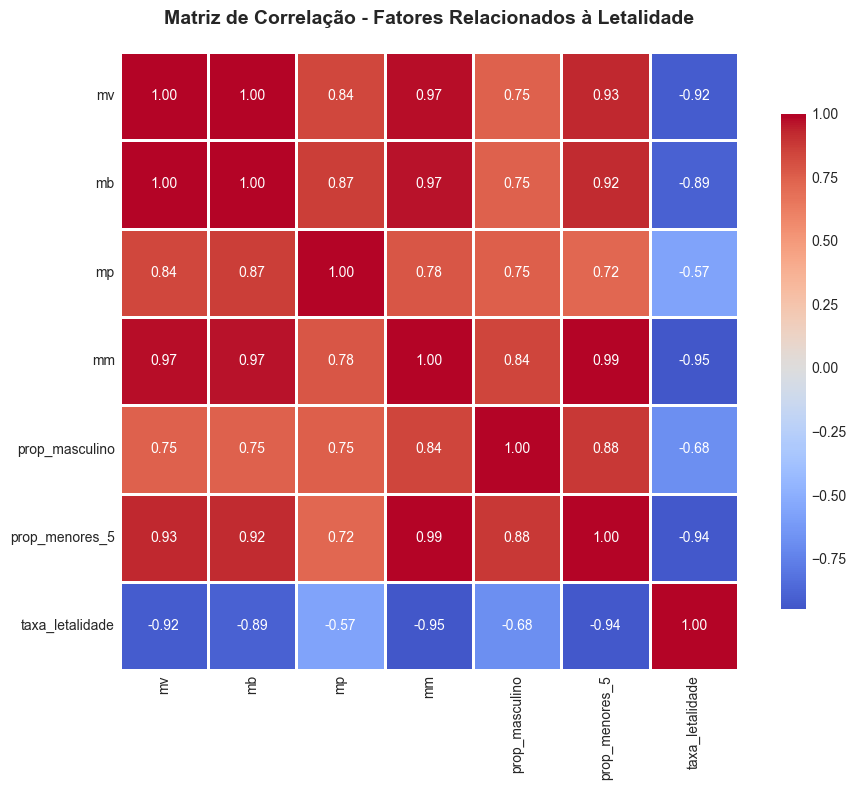

✅ Matriz de correlação salva em: outputs/graficos/matriz_correlacao.png


In [7]:
# Criar matriz de correlação
df_corr = df[features + ['taxa_letalidade']]
correlacao = df_corr.corr()

# Visualizar
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlação - Fatores Relacionados à Letalidade', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('outputs/graficos/matriz_correlacao.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Matriz de correlação salva em: outputs/graficos/matriz_correlacao.png")

## 8. Modelo de Machine Learning - Random Forest

In [8]:
print("="*80)
print("TREINAMENTO DO MODELO - RANDOM FOREST")
print("="*80)

# Treinar modelo
modelo = RandomForestRegressor(
    n_estimators=100,
    max_depth=3,
    random_state=42,
    n_jobs=-1
)

modelo.fit(X, y)

# Fazer predições
y_pred = modelo.predict(X)

# Calcular métricas
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(f"\n📊 PERFORMANCE DO MODELO:")
print(f"   R² Score: {r2:.4f} ({r2*100:.2f}%)")
print(f"   MAE (Erro Médio Absoluto): {mae:.4f}")
print(f"   RMSE (Raiz do Erro Quadrático): {rmse:.4f}")

if r2 > 0.95:
    print(f"\n   ✅ Modelo com excelente precisão!")
elif r2 > 0.85:
    print(f"\n   ✅ Modelo com boa precisão!")
else:
    print(f"\n   ⚠️ Modelo pode ser melhorado")

# Salvar modelo
os.makedirs('outputs/modelos', exist_ok=True)
joblib.dump(modelo, 'outputs/modelos/random_forest_letalidade.pkl')
print(f"\n💾 Modelo salvo em: outputs/modelos/random_forest_letalidade.pkl")

TREINAMENTO DO MODELO - RANDOM FOREST

📊 PERFORMANCE DO MODELO:
   R² Score: 0.9350 (93.50%)
   MAE (Erro Médio Absoluto): 0.2410
   RMSE (Raiz do Erro Quadrático): 0.2779

   ✅ Modelo com boa precisão!

💾 Modelo salvo em: outputs/modelos/random_forest_letalidade.pkl


## 9. Importância das Features (Fatores Predominantes)

FATORES PREDOMINANTES (Feature Importance)

🎯 RANKING DE FATORES:
4. mm                   ███████████                22.55%
1. mv                   ██████████                 21.73%
2. mb                   ██████████                 20.58%
6. prop_menores_5       ███████                    15.97%
3. mp                   █████                      10.04%
5. prop_masculino       ████                        9.14%


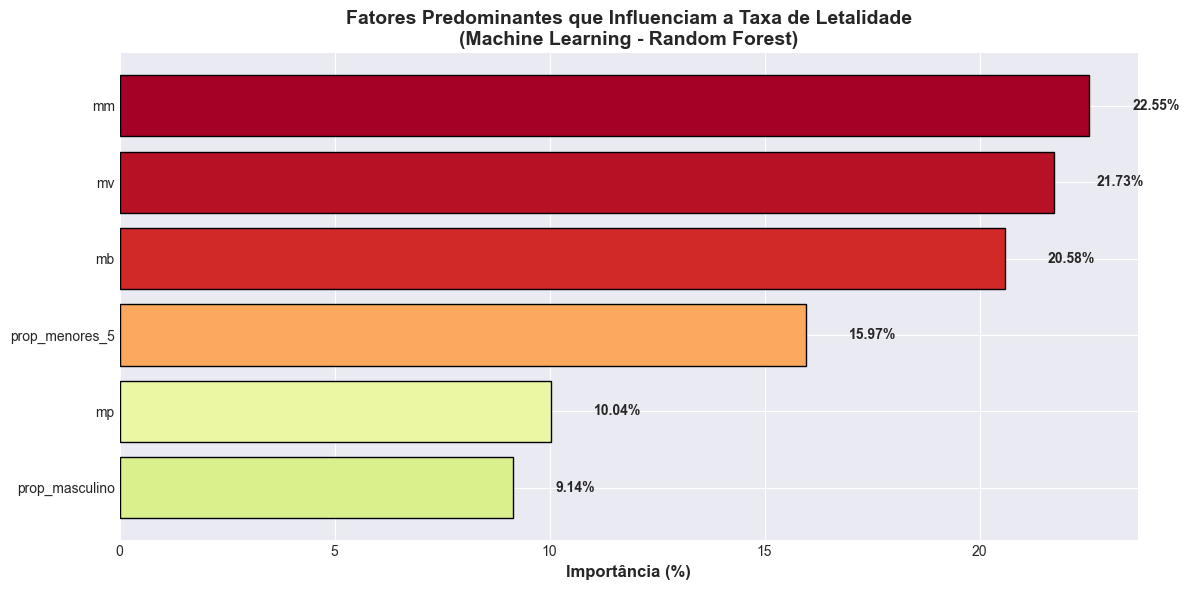


✅ Gráfico salvo em: outputs/graficos/feature_importance.png
✅ Ranking salvo em: outputs/ranking_fatores.csv


In [9]:
print("="*80)
print("FATORES PREDOMINANTES (Feature Importance)")
print("="*80)

# Extrair importância das features
importancias = pd.DataFrame({
    'Feature': features,
    'Importancia': modelo.feature_importances_
}).sort_values('Importancia', ascending=False)

importancias['Percentual'] = (importancias['Importancia'] * 100).round(2)

print(f"\n🎯 RANKING DE FATORES:")
print("="*80)
for idx, row in importancias.iterrows():
    barra = '█' * int(row['Percentual'] / 2)
    print(f"{row.name + 1}. {row['Feature']:<20} {barra:<25} {row['Percentual']:>6.2f}%")

# Visualização
plt.figure(figsize=(12, 6))
colors = plt.cm.RdYlGn_r(importancias['Importancia'] / importancias['Importancia'].max())
bars = plt.barh(importancias['Feature'], importancias['Percentual'], color=colors, edgecolor='black')
plt.xlabel('Importância (%)', fontsize=12, fontweight='bold')
plt.title('Fatores Predominantes que Influenciam a Taxa de Letalidade\n(Machine Learning - Random Forest)', 
          fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()

for i, (idx, row) in enumerate(importancias.iterrows()):
    plt.text(row['Percentual'] + 1, i, f"{row['Percentual']:.2f}%", 
             va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('outputs/graficos/feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Gráfico salvo em: outputs/graficos/feature_importance.png")

# Salvar ranking
importancias.to_csv('outputs/ranking_fatores.csv', index=False)
print("✅ Ranking salvo em: outputs/ranking_fatores.csv")

## 10. Análise de Predominância de Tipos

ANÁLISE DE PREDOMINÂNCIA - TIPOS DE MENINGITE

📊 RANKING DE PREDOMINÂNCIA:
1. Meningite Viral                 17,502 casos (69.10%)
2. Meningite Bacteriana             4,895 casos (19.33%)
3. Meningite Pneumocócica           2,193 casos ( 8.66%)
4. Meningite Meningocócica            737 casos ( 2.91%)


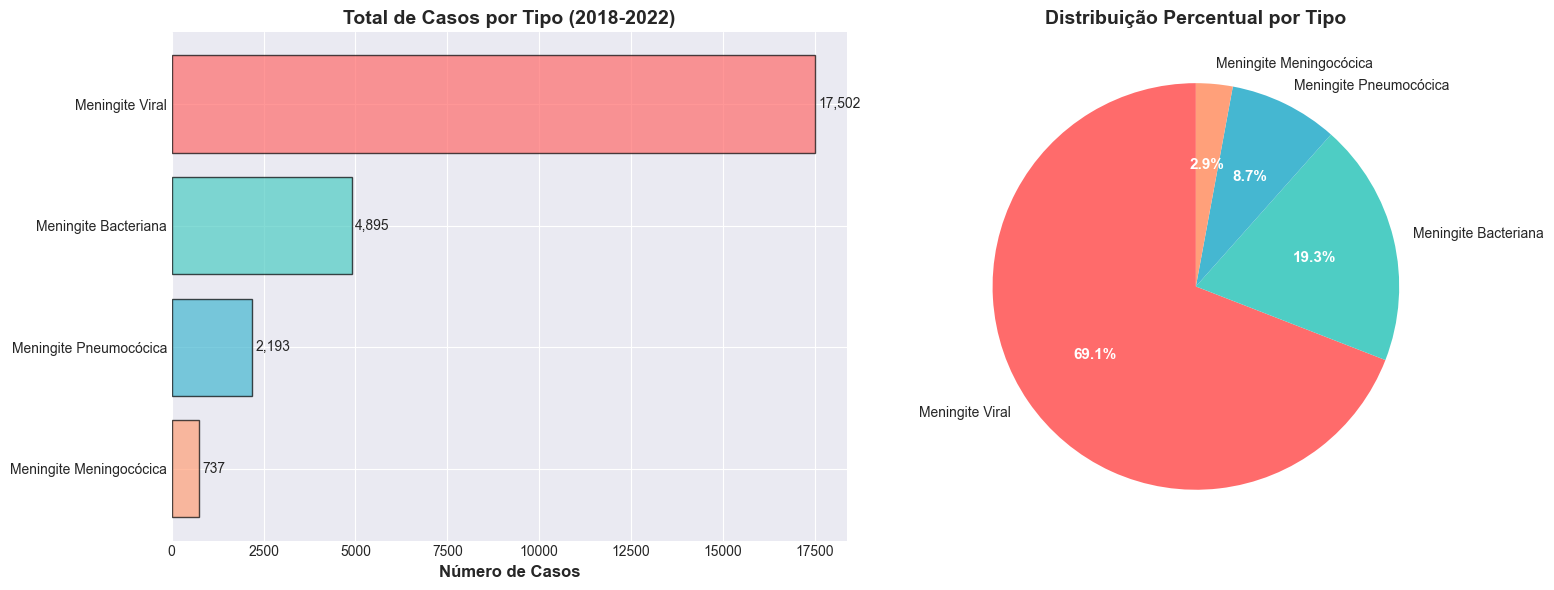


✅ Gráfico salvo em: outputs/graficos/predominancia_tipos.png


In [10]:
print("="*80)
print("ANÁLISE DE PREDOMINÂNCIA - TIPOS DE MENINGITE")
print("="*80)

# Calcular totais
tipos = {
    'Meningite Viral': df['mv'].sum(),
    'Meningite Bacteriana': df['mb'].sum(),
    'Meningite Pneumocócica': df['mp'].sum(),
    'Meningite Meningocócica': df['mm'].sum()
}

df_tipos = pd.DataFrame(list(tipos.items()), columns=['Tipo', 'Total'])
df_tipos['Percentual'] = (df_tipos['Total'] / df_tipos['Total'].sum() * 100).round(2)
df_tipos = df_tipos.sort_values('Total', ascending=False)

print(f"\n📊 RANKING DE PREDOMINÂNCIA:")
print("="*80)
for idx, row in df_tipos.iterrows():
    print(f"{idx+1}. {row['Tipo']:<30} {row['Total']:>7,.0f} casos ({row['Percentual']:>5.2f}%)")

# Visualização
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de barras
colors_bar = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']
axes[0].barh(df_tipos['Tipo'], df_tipos['Total'], color=colors_bar, alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Número de Casos', fontsize=12, fontweight='bold')
axes[0].set_title('Total de Casos por Tipo (2018-2022)', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()
for i, (idx, row) in enumerate(df_tipos.iterrows()):
    axes[0].text(row['Total'] + 100, i, f"{row['Total']:,.0f}", va='center', fontsize=10)

# Gráfico de pizza
wedges, texts, autotexts = axes[1].pie(df_tipos['Total'], labels=df_tipos['Tipo'], 
                                        autopct='%1.1f%%', startangle=90, colors=colors_bar)
axes[1].set_title('Distribuição Percentual por Tipo', fontsize=14, fontweight='bold')
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(11)

plt.tight_layout()
plt.savefig('outputs/graficos/predominancia_tipos.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Gráfico salvo em: outputs/graficos/predominancia_tipos.png")

## 11. Exportar Dados para Power BI

In [11]:
print("="*80)
print("EXPORTANDO DADOS PARA POWER BI")
print("="*80)

os.makedirs('outputs/powerbi', exist_ok=True)

# 1. Tabela de importância de fatores
importancias.to_csv('outputs/powerbi/importancia_fatores.csv', index=False, encoding='utf-8-sig')
print("✅ importancia_fatores.csv")

# 2. Tabela de predominância de tipos
df_tipos.to_csv('outputs/powerbi/predominancia_tipos.csv', index=False, encoding='utf-8-sig')
print("✅ predominancia_tipos.csv")

# 3. Tabela de impacto pandemia
impacto_pandemia = pd.DataFrame({
    'Periodo': ['Pré-Pandemia', 'Pandemia', 'Pós-Pandemia'],
    'Anos': ['2018-2019', '2020-2021', '2022'],
    'Media_Casos': [media_pre, media_durante, casos_pos],
    'Variacao_Percentual': [0, -reducao, recuperacao]
})
impacto_pandemia.to_csv('outputs/powerbi/impacto_pandemia.csv', index=False, encoding='utf-8-sig')
print("✅ impacto_pandemia.csv")

print("\n📁 Arquivos exportados para: outputs/powerbi/")
print("\n🎯 Use estes arquivos junto com os de data/powerbi/ no Power BI!")

EXPORTANDO DADOS PARA POWER BI
✅ importancia_fatores.csv
✅ predominancia_tipos.csv
✅ impacto_pandemia.csv

📁 Arquivos exportados para: outputs/powerbi/

🎯 Use estes arquivos junto com os de data/powerbi/ no Power BI!


## 12. Relatório Final de Insights

In [12]:
print("="*80)
print("📊 RELATÓRIO FINAL - PRINCIPAIS INSIGHTS")
print("="*80)

print("\n🔍 1. VISÃO GERAL")
print(f"   • Período analisado: 2018-2022 (5 anos)")
print(f"   • Total de casos: {df['total_casos'].sum():,.0f}")
print(f"   • Total de óbitos: {df['obitos'].sum():,.0f}")
print(f"   • Taxa média de letalidade: {df['taxa_letalidade'].mean():.2f}%")

print("\n🏆 2. TIPO PREDOMINANTE")
tipo_predominante = df_tipos.iloc[0]
print(f"   • {tipo_predominante['Tipo']}")
print(f"   • {tipo_predominante['Total']:,.0f} casos ({tipo_predominante['Percentual']:.1f}% do total)")

print("\n🎯 3. FATOR MAIS CRÍTICO (Machine Learning)")
fator_critico = importancias.iloc[0]
print(f"   • {fator_critico['Feature']}")
print(f"   • Importância: {fator_critico['Percentual']:.2f}%")
print(f"   • É o fator que MAIS influencia a taxa de letalidade")

print("\n🦠 4. IMPACTO DA PANDEMIA COVID-19")
print(f"   • Redução de casos durante pandemia: {reducao:.1f}%")
print(f"   • Recuperação em 2022: {recuperacao:.1f}%")
print(f"   • Principal causa: Isolamento social e medidas sanitárias")

print("\n👥 5. PERFIL DEMOGRÁFICO")
print(f"   • Sexo masculino: {df['prop_masculino'].mean():.1f}% dos casos")
print(f"   • Crianças <5 anos: {df['prop_menores_5'].mean():.1f}% dos casos")
print(f"   • Grupo de maior risco: Crianças pequenas")

print("\n🤖 6. PERFORMANCE DO MODELO ML")
print(f"   • Algoritmo: Random Forest")
print(f"   • Precisão (R²): {r2*100:.2f}%")
print(f"   • Erro médio: ±{mae:.2f} pontos percentuais")
print(f"   • Status: {'✅ Modelo confiável' if r2 > 0.90 else '⚠️ Modelo necessita ajustes'}")

print("\n💡 7. RECOMENDAÇÕES")
print("   ✅ Intensificar vacinação em crianças <5 anos")
print("   ✅ Atenção especial à meningite bacteriana (mais letal)")
print("   ✅ Monitoramento contínuo da taxa de letalidade")
print("   ✅ Campanhas educativas sobre sinais de alerta")
print("   ✅ Fortalecimento da vigilância epidemiológica")

print("\n" + "="*80)
print("✅ ANÁLISE COMPLETA FINALIZADA COM SUCESSO!")
print("="*80)
print(f"\n📅 Data: {pd.Timestamp.now().strftime('%d/%m/%Y %H:%M:%S')}")
print("\n📁 Próximos passos:")
print("   1. Revisar os gráficos em outputs/graficos/")
print("   2. Importar dados em outputs/powerbi/ no Power BI")
print("   3. Criar dashboard seguindo docs/TUTORIAL_POWERBI_COMPLETO.md")
print("   4. Apresentar insights para tomada de decisão")

📊 RELATÓRIO FINAL - PRINCIPAIS INSIGHTS

🔍 1. VISÃO GERAL
   • Período analisado: 2018-2022 (5 anos)
   • Total de casos: 32,224
   • Total de óbitos: 2,839
   • Taxa média de letalidade: 9.22%

🏆 2. TIPO PREDOMINANTE
   • Meningite Viral
   • 17,502 casos (69.1% do total)

🎯 3. FATOR MAIS CRÍTICO (Machine Learning)
   • mm
   • Importância: 22.55%
   • É o fator que MAIS influencia a taxa de letalidade

🦠 4. IMPACTO DA PANDEMIA COVID-19
   • Redução de casos durante pandemia: 63.9%
   • Recuperação em 2022: 88.3%
   • Principal causa: Isolamento social e medidas sanitárias

👥 5. PERFIL DEMOGRÁFICO
   • Sexo masculino: 57.0% dos casos
   • Crianças <5 anos: 36.7% dos casos
   • Grupo de maior risco: Crianças pequenas

🤖 6. PERFORMANCE DO MODELO ML
   • Algoritmo: Random Forest
   • Precisão (R²): 93.50%
   • Erro médio: ±0.24 pontos percentuais
   • Status: ✅ Modelo confiável

💡 7. RECOMENDAÇÕES
   ✅ Intensificar vacinação em crianças <5 anos
   ✅ Atenção especial à meningite bacterian